In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [89]:
run = pd.read_csv('ActivityList_MaryRobert.csv')
run.head()

id type  x_gear_name  day  month  year  x_start_h         name  \
0  975545643  Run          NaN   11      2  2017       10.7  Morning Run   
1  975545595  Run          NaN   18      2  2017       10.3  Morning Run   
2  975545491  Run          NaN   19      2  2017        9.7  Morning Run   
3  975545407  Run          NaN   21      2  2017        6.0  Morning Run   
4  975545534  Run          NaN   22      2  2017        6.0  Morning Run   

   x_min    x_km  ...  start_longitude                   timezone  \
0   74.3  11.448  ...        -1.203424  (GMT+00:00) Europe/London   
1   82.8  12.755  ...        -1.203288  (GMT+00:00) Europe/London   
2   42.7   7.242  ...        -1.203178  (GMT+00:00) Europe/London   
3   37.1   6.446  ...        -1.203521  (GMT+00:00) Europe/London   
4   33.7   5.935  ...        -1.203256  (GMT+00:00) Europe/London   

   total_photo_count  trainer     upload_id  upload_id_str  utc_offset  \
0                  0        0  1.076616e+09   1.076616e+09           0   
1                  0        0  1.076616e+09   1.076616e+09           0   
2                  0        0  1.076616e+09   1.076616e+09           0   
3                  0        0  1.076616e+09   1.076616e+09           0   
4                  0        0  1.076616e+09   1.076616e+09           0   

      x_date  x_elev_%                                        x_url  
0  2/11/2017      0.62  https://www.strava.com/activities/975545643  
1  2/18/2017      0.68  https://www.strava.com/activities/975545595  
2  2/19/2017      0.88  https://www.strava.com/activities/975545491  
3  2/21/2017      0.95  https://www.strava.com/activities/975545407  
4  2/22/2017      0.72  https://www.strava.com/activities/975545534  

[5 rows x 75 columns]

In [90]:
run_clean = run[(run['type'] == 'Run')] 
run_clean.count()

id               616
type             616
x_gear_name        0
day              616
month            616
                ... 
upload_id_str    614
utc_offset       616
x_date           616
x_elev_%         607
x_url            616
Length: 75, dtype: int64

In [91]:
data = run_clean[["x_min/mi", "x_start_h", "x_min", "total_elevation_gain", "month"]]
data.head()

x_min/mi  x_start_h  x_min  total_elevation_gain  month
0     10.45       10.7   74.3                  70.5      2
1     10.45       10.3   82.8                  87.1      2
2      9.48        9.7   42.7                  63.5      2
3      9.26        6.0   37.1                  61.3      2
4      9.15        6.0   33.7                  42.5      2

In [92]:
data['month'] = data['month'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
# Assign X (data) and y (target)

X = data[['x_start_h', 'x_min', 'total_elevation_gain', 'month']]
y = data["x_min/mi"].values.reshape(-1, 1)
print(X.shape, y.shape)


(616, 4) (616, 1)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

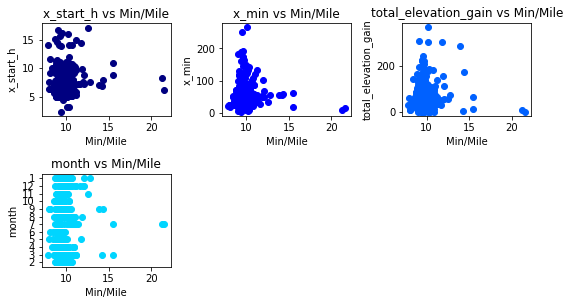

In [94]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["x_min/mi"], asset, c = next(colors))
        ax.set_xlabel("Min/Mile")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Min/Mile")
    fig.tight_layout() 
    plt.show()
        
variables = X[-1:]  
 
correlation(data,variables,3,3)

In [86]:
data['x_min/mi'].

x_min/mi  x_start_h    x_min  total_elevation_gain
x_min/mi                   1.0     4069.1   5902.1                5794.2
x_start_h               4069.1        1.0   4171.9                4115.8
x_min                   5902.1     4171.9      1.0               27963.4
total_elevation_gain    5794.2     4115.8  27963.4                   1.0

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [98]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

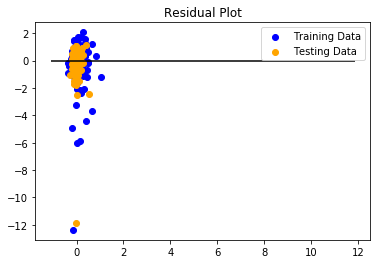

In [100]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

predictions_train = model.predict(X_train_scaled)

MSE_train = mean_squared_error(y_train_scaled, predictions_train)
r2_train = model.score(X_train_scaled, y_train_scaled)
print(f"Train MSE: {MSE_train}, Train R2: {r2_train}")

Train MSE: 0.9784833586412501, Train R2: 0.02151664135875009


In [102]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"Tes MSE: {MSE}, Test R2: {r2}")

Tes MSE: 1.3804353293903102, Test R2: 0.011350497620925992


In [107]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train_scaled)
poly_reg.fit(X_poly, y_train_scaled)
polymodel_4 = LinearRegression()
polymodel_4.fit(X_poly, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
predictions4 = polymodel_4.predict(X_test_scaled)
polymodel_4.fit(X_train_scaled, y_train_scaled)

plt.scatter(polymodel_4.predict(X_train_scaled), polymodel_4.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(polymodel_4.predict(X_test_scaled), polymodel_4.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot Polynomial 4")
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 70 is different from 4)

In [78]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3774877208486205, R2: 0.01346153582453169


In [79]:
# Ridge model

from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3804344643678808, R2: 0.011351117138534761


In [80]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3784936260522875, R2: 0.012741119838449055
